In [1]:
# 분석 알고리즘 
# 12.27 ver1_LightGBM 사용


In [2]:
# 시각화 : 변수중요도(barplot), auc_roc혼동행렬(heatmap) 사용

In [416]:
# 라이브러리 호출

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [417]:
df = pd.read_csv('C:/myPyCode/data/spaceship-titanic/train.csv', index_col = 0)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [418]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<AxesSubplot:>

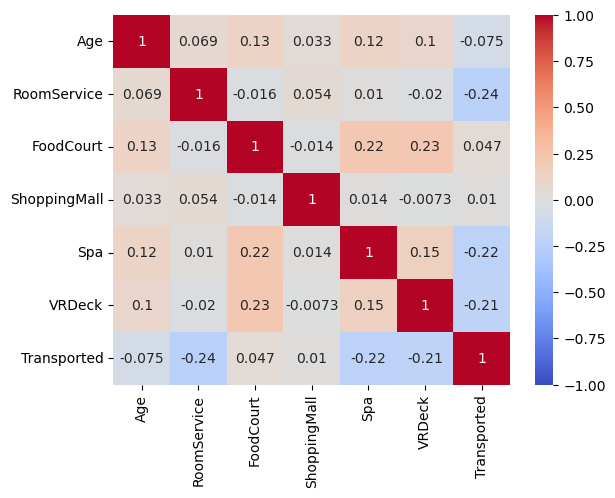

In [419]:
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, cmap = 'coolwarm')

In [420]:
df.info()
# 종속변수는 Transported
# 독립변수는 Transported 외 필요한 데이터로 하기로 함
# PassengerId 필요, Transported 필요

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [421]:
# 불필요한 데이터 분석

# Name, Cabin(좌석 번호는 랜덤), 
# df.Name
# df.Cabin
df.describe(include='O')
# df.HomePlanet.value_counts()
# df.Destination.unique


,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8492,8476,8494,8511,8490,8493
unique,3,2,6560,3,2,8473
top,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,4602,5439,8,5915,8291,2


In [422]:
df.VIP.unique

<bound method Series.unique of PassengerId
0001_01    False
0002_01    False
0003_01     True
0003_02    False
0004_01    False
           ...  
9276_01     True
9278_01    False
9279_01    False
9280_01    False
9280_02    False
Name: VIP, Length: 8693, dtype: object>

In [423]:
df.describe(include='O')

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8492,8476,8494,8511,8490,8493
unique,3,2,6560,3,2,8473
top,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,4602,5439,8,5915,8291,2


In [424]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [425]:
# 필요한 데이터 : PassengerId(아이디), HomePlanet(지구, 유로파, 화성 3종류), cryosleep(냉동수면y/n), VIP(y/n)

In [426]:
df2 = df.copy()
df2.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [427]:
# 결측치 확인
df.isna().mean()
# 룸서비스, 푸드코트, 쇼핑몰, 스파, vr덱 결측치는 평균값으로 계산
# 홈플래닛은 최빈값, Age는 평균값으로 처리, VIP는 F로 처리, 냉동수면은 F, 데스티네이션은 최빈값으로 처리

HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [428]:
# 열 삭제 주의
df.drop(['Name','Cabin'], axis = 1, inplace =True)
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True


<AxesSubplot:>

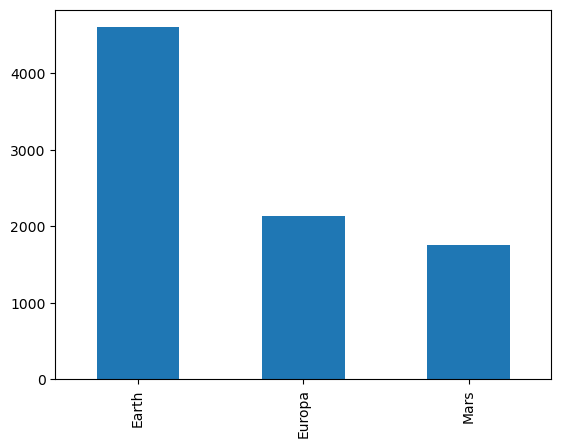

In [429]:
#결측치 처리 - homeplanet : 최빈값
df.HomePlanet.value_counts().plot(kind='bar')

<AxesSubplot:>

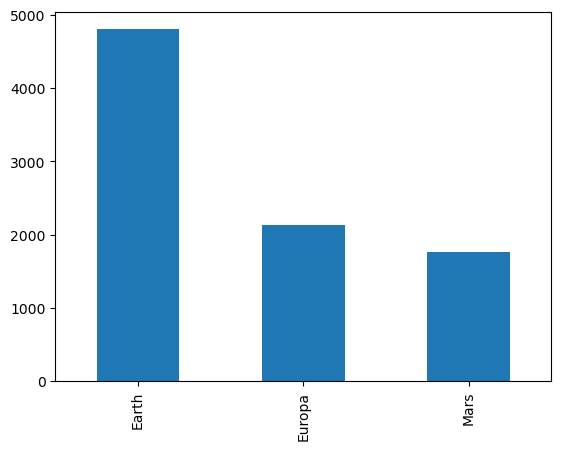

In [430]:
# 홈플래닛 최빈값 처리 완료
# 주의
df.HomePlanet = df.HomePlanet.fillna('Earth')
df.HomePlanet.value_counts().plot(kind='bar')

In [431]:
df3 = df.copy()
df3.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [432]:
df = df3

In [433]:
# 결측치 처리 - 룸서비스, 푸드코트, 쇼핑몰, 스파, vr덱 : 평균
df.RoomService.fillna(df.RoomService.mean(), inplace=True)
df.FoodCourt.fillna(df.FoodCourt.mean(), inplace=True)
df.ShoppingMall.fillna(df.ShoppingMall.mean(), inplace=True)
df.Spa.fillna(df.Spa.mean(), inplace=True)
df.VRDeck.fillna(df.VRDeck.mean(), inplace=True)

In [434]:
df.isnull().sum()

HomePlanet        0
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [435]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [436]:
# 결측치 - age : 최빈값처리
df.Age.fillna(df.Age.median(), inplace = True)

In [437]:
# df = pd.get_dummies(df, columns = ['CryoSleep','Destination','VIP','HomePlanet','Transported'], drop_first=True)
df = pd.get_dummies(df, columns = ['CryoSleep','Destination','VIP','HomePlanet'], drop_first=True)
df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,HomePlanet_Europa,HomePlanet_Mars
PassengerId,,,,,,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False,0,0,1,0,1,0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True,0,0,1,0,0,0
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,1,1,0
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,0,1,0
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,False,0,0,0,1,1,0
9278_01,18.0,0.0,0.0,0.0,0.0,0.0,False,1,1,0,0,0,0
9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,True,0,0,1,0,0,0


In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        4277 non-null   float64
 1   RoomService                4277 non-null   float64
 2   FoodCourt                  4277 non-null   float64
 3   ShoppingMall               4277 non-null   float64
 4   Spa                        4277 non-null   float64
 5   VRDeck                     4277 non-null   float64
 6   CryoSleep_True             4277 non-null   uint8  
 7   Destination_PSO J318.5-22  4277 non-null   uint8  
 8   Destination_TRAPPIST-1e    4277 non-null   uint8  
 9   VIP_True                   4277 non-null   uint8  
 10  HomePlanet_Europa          4277 non-null   uint8  
 11  HomePlanet_Mars            4277 non-null   uint8  
dtypes: float64(6), uint8(6)
memory usage: 259.0+ KB


<AxesSubplot:ylabel='Transported'>

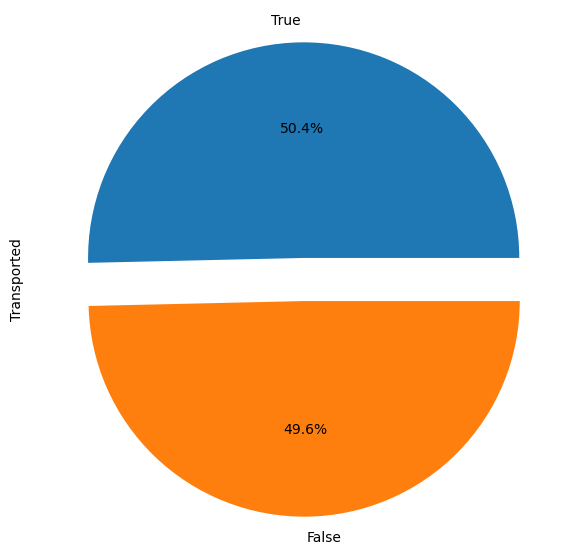

In [440]:
# 건너간사람과 건너가지 못한 사람의 비율
plt.figure(figsize=(7,7))
df['Transported'].value_counts().plot.pie(
    explode=[0.1,0.1], autopct='%1.1f%%')

In [442]:
# 데이터 전처리 종료
# 훈련셋/ 시험셋 분리 시작

X = df.drop('Transported', axis = 1)
y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [443]:
X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,HomePlanet_Europa,HomePlanet_Mars
PassengerId,,,,,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,0,0,1,0,0,0
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,1,1,0
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,1,0
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,0,0,0,1,1,0
9278_01,18.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,0,0,1,0,0,0


In [444]:
# 필요한 lightgbm 패키지 호출
import lightgbm as lgb

In [445]:
# LightGBM 분류기 정의
model = lgb.LGBMClassifier(random_state = 100)

model

LGBMClassifier(random_state=100)

In [446]:
# Lightgbm 학습 시작

model.fit(X_train, y_train)
pred = model.predict(X_test)

In [447]:
# 예측값
pred

array([False, False,  True, ...,  True,  True,  True])

In [448]:
# 정확도 점수
accuracy_score(y_test, pred) # 낮은 점수로 인해 패러미터 튜닝 시작 필요

0.7897884084636615

In [449]:
# RandomSearchCV 이용

from sklearn.model_selection import RandomizedSearchCV


In [450]:
# # 사용할 params정의
params = {"n_estimators" : [100, 500, 1000],"learning_rate" : [0.01, 0.05, 0.1, 0.3]
          ,"lambda_l1" : [0, 10, 20],"lambda_l2" : [0, 10, 20],"max_depth" : [5, 10, 15, 20],"subsample": [0.6, 0.8, 1]}
# params = {"n_estimators" : [1000],"learning_rate" : [0.3]
#           ,"lambda_l1" : [10],"lambda_l2" : [10],"max_depth" : [20],"subsample": [1]}

In [451]:
# LigthGBM 사용

model_2 = lgb.LGBMClassifier(random_state = 100)

lg = RandomizedSearchCV(model_2,
      param_distributions = params, 
      n_iter = 30, scoring = 'roc_auc', 
      random_state=100, n_jobs = -1)



In [452]:
lg

RandomizedSearchCV(estimator=LGBMClassifier(random_state=100), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'lambda_l1': [0, 10, 20],
                                        'lambda_l2': [0, 10, 20],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.6, 0.8, 1]},
                   random_state=100, scoring='roc_auc')

In [453]:
lg.fit(X_train, y_train) # 30초 가량 소요

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


RandomizedSearchCV(estimator=LGBMClassifier(random_state=100), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'lambda_l1': [0, 10, 20],
                                        'lambda_l2': [0, 10, 20],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.6, 0.8, 1]},
                   random_state=100, scoring='roc_auc')

In [454]:
lg.best_params_ # 최적의 패러미터를 계산

{'subsample': 0.8,
 'n_estimators': 500,
 'max_depth': 20,
 'learning_rate': 0.01,
 'lambda_l2': 0,
 'lambda_l1': 0}

In [455]:
lg.best_score_ # 최적의 점수계산

0.8765142818325253

In [456]:
lg_proba = lg.predict_proba(X_test)
lg_proba

array([[0.94023679, 0.05976321],
       [0.81805936, 0.18194064],
       [0.10973714, 0.89026286],
       ...,
       [0.29261386, 0.70738614],
       [0.16440701, 0.83559299],
       [0.37558404, 0.62441596]])

In [457]:
k = roc_auc_score(y_test, lg_proba[:,1]) # roc_auc 점수계산
k

0.8704691174776167

In [458]:
# 혼동행렬 호출
from sklearn.metrics import confusion_matrix, classification_report

In [459]:
def confusion_matrix_view(y_test, pred):
    plt.figure(figsize = (10,6))
    cf_matrix = confusion_matrix(y_test, pred)
    print(cf_matrix)
    
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                   cf_matrix.flatten()] # 평평화
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]
    
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
             zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cf_matrix, annot = labels, fmt='', cmap='coolwarm')
    
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
    # 분류 리포트 제출
    print(classification_report(y_test, pred))

[[834 288]
 [159 893]]


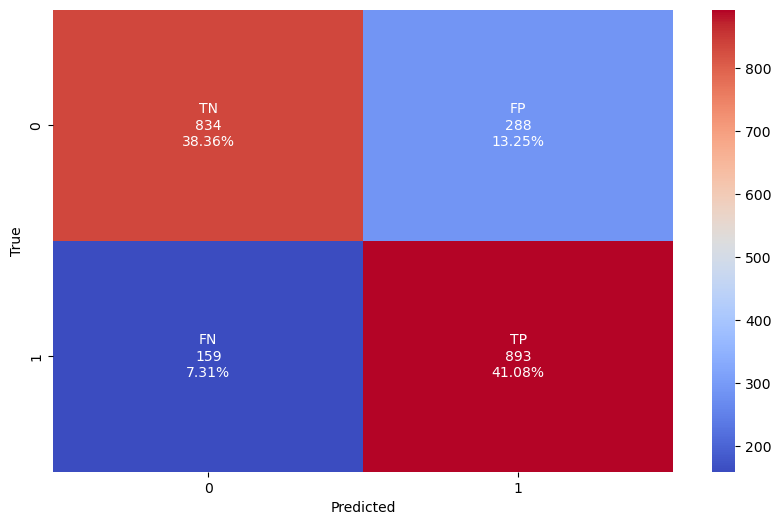

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1122
           1       0.76      0.85      0.80      1052

    accuracy                           0.79      2174
   macro avg       0.80      0.80      0.79      2174
weighted avg       0.80      0.79      0.79      2174



In [263]:
confusion_matrix_view(y_test, lg.predict(X_test))

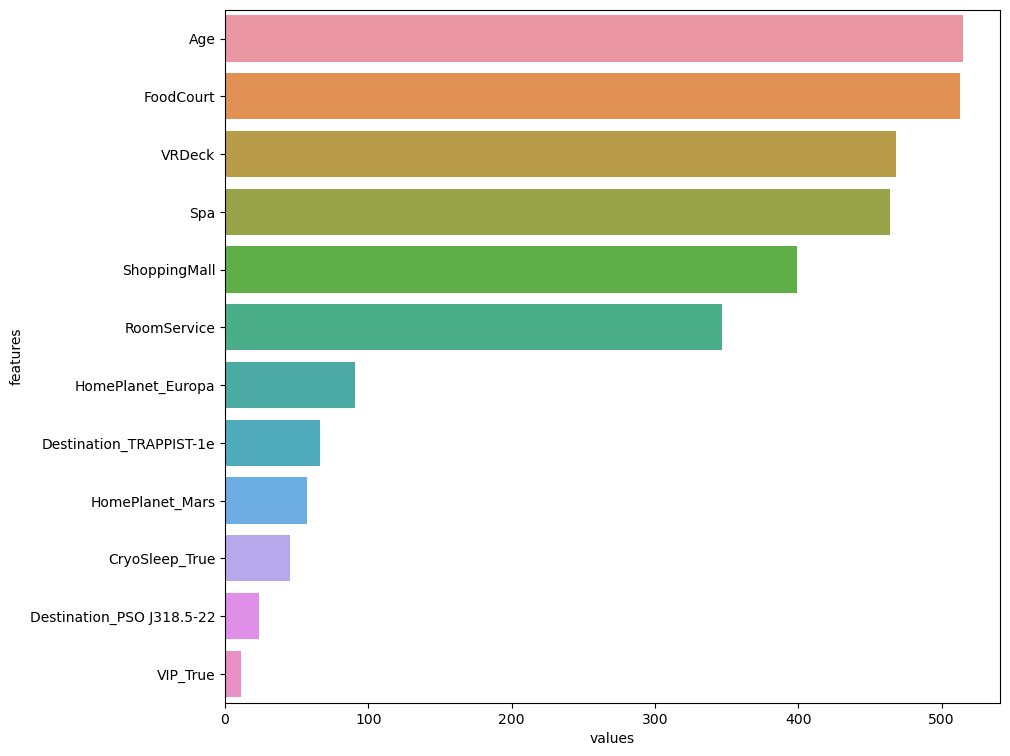

In [460]:
# 변수 중요도 확인

feature_important = pd.DataFrame({'features':X_train.columns,
                                 'values':model.feature_importances_})
plt.figure(figsize=(10,9))
sns.barplot(x='values', y='features', data=feature_important.sort_values
           (by='values',ascending = False))
plt.show()

In [319]:
# 모델 joblib으로 저장
import joblib

In [322]:
joblib.dump(lg, 'C:/myPyCode/lg.pkl')

['C:/myPyCode/lg.pkl']

In [461]:
lg

RandomizedSearchCV(estimator=LGBMClassifier(random_state=100), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'lambda_l1': [0, 10, 20],
                                        'lambda_l2': [0, 10, 20],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.6, 0.8, 1]},
                   random_state=100, scoring='roc_auc')

In [462]:
df = pd.read_csv('C:/myPyCode/data/spaceship-titanic/test.csv',index_col = 0)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


In [463]:
# test 결측치
df.isnull().mean()

HomePlanet      0.020341
CryoSleep       0.021744
Cabin           0.023381
Destination     0.021510
Age             0.021277
VIP             0.021744
RoomService     0.019172
FoodCourt       0.024784
ShoppingMall    0.022913
Spa             0.023615
VRDeck          0.018705
Name            0.021978
dtype: float64

In [464]:
# 모든 feature 결측치 처리
df.drop(['Name','Cabin'], axis = 1, inplace =True)
df.HomePlanet = df.HomePlanet.fillna('Earth')
df.Age.fillna(df.Age.median(), inplace = True)
df.RoomService.fillna(df.RoomService.mean(), inplace=True)
df.FoodCourt.fillna(df.FoodCourt.mean(), inplace=True)
df.ShoppingMall.fillna(df.ShoppingMall.mean(), inplace=True)
df.Spa.fillna(df.Spa.mean(), inplace=True)
df.VRDeck.fillna(df.VRDeck.mean(), inplace=True)


In [465]:
# test 결측치 처리 완료
df = pd.get_dummies(df, columns = ['CryoSleep','Destination','VIP','HomePlanet'], drop_first=True)
df.isnull().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
CryoSleep_True               0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_True                     0
HomePlanet_Europa            0
HomePlanet_Mars              0
dtype: int64

In [466]:
# test 파일의 X 시험셋 정의
test_X = df
test_X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,HomePlanet_Europa,HomePlanet_Mars
PassengerId,,,,,,,,,,,,
0013_01,27.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,1,0,0,0
0019_01,31.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,0,0,1,0,1,0
0023_01,20.0,10.0,0.0,635.0,0.0,0.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,34.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
9269_01,42.0,0.0,847.0,17.0,10.0,144.0,0,0,1,0,0,0
9271_01,26.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1


In [467]:
lg_predict = model.predict(test_X)

In [468]:
sample_submission = pd.read_csv('C:/myPyCode/data/spaceship-titanic/sample_submission.csv')
sample_submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [469]:
sample_submission["Transported"] = sample_submission["Transported"].astype(bool)
sample_submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [470]:
sample_submission["Transported"] = lg_predict
sample_submission.to_csv('C:/myPyCode/data/spaceship-titanic/LightGBM_Classifier_submission.csv', index=False)

In [471]:
sample_submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
